Importing the Libraries for Data-Description

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

Read the data from 'dataset.csv' file and create a dataframe

In [40]:
df = pd.read_csv('dataset.csv')
df.shape

(9713, 11)

In [41]:
df.head()

,PhishID,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
0,8220112,0,0,1,1,1,-1,-1,-1,-1,1
1,8210845,1,0,1,1,1,-1,1,-1,1,1
2,8210844,1,0,1,1,1,-1,1,-1,1,1
3,8202280,1,0,1,1,1,-1,-1,0,1,1
4,8193253,0,0,1,1,1,-1,-1,-1,1,1


In [42]:
df.columns

Index(['PhishID', 'frequency_of_a_tags', 'frequency_of_alltags',
       'presence_of_iframes', 'presence_of_popups', 'right_click_disabling',
       'checking_sfh', 'request_url', 'url-of-anchor', 'links_in_meta_img',
       'Result'],
      dtype='object')

In [43]:
data_no_duplicates = df.drop_duplicates()
df = data_no_duplicates.dropna()

As the column names have leading white spaces, we will rename the columns

In [44]:
df.shape

(6072, 11)

In [45]:
df = df.drop('PhishID', axis = 1)

As we had merged two csv files to create a dataset, we need to check the unique values present in each column

In [46]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
# unique_redirects = df['num_of_redirects'].unique()
# unique_cookies = df['checking_cookies'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
# print(unique_redirects)
# print(unique_cookies)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)

['0' '1' '-1' 'frequency_of_a_tags']
['0' '-1' '1' 'frequency_of_alltags']
['1' 'presence_of_iframes']
['1' '0' '-1' 'presence_of_popups']
['1' 'right_click_disabling' '-1']
['-1' '1' '0' 'checking_sfh']
['-1' '1' '0' 'request_url']
['-1' '0' '1' 'url-of-anchor']
['-1' '1' '0' 'links_in_meta_img']
['1' 'Result' '-1']


As there are white-space along with 1, 0, and -1 we need to remove rest of the things, and then convert the values to int 

In [47]:
validValues = {-1, 0, 1}

for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
    df = df[df[column].isin(validValues)]

# Convert all columns to integers (again after the filtering)
df = df.astype(int)

In [48]:
# Now you can use the DataFrame with valid integer values (1, -1, and 0)
print(df)

      frequency_of_a_tags  frequency_of_alltags  presence_of_iframes  \
0                       0                     0                    1   
1                       1                     0                    1   
2                       1                     0                    1   
3                       1                     0                    1   
4                       0                     0                    1   
...                   ...                   ...                  ...   
6875                   -1                     0                    1   
6876                   -1                     0                    1   
6877                   -1                     0                    1   
6878                   -1                     0                    1   
6879                    0                     0                    1   

      presence_of_popups  right_click_disabling  checking_sfh  request_url  \
0                      1                      1          

Again check for the unique values present in each column

In [49]:
# Investigate unique values in the each column
unique_frequency_a = df['frequency_of_a_tags'].unique()
unique_all = df['frequency_of_alltags'].unique()
unique_iframes = df['presence_of_iframes'].unique()
unique_popups = df['presence_of_popups'].unique()
unique_rightclick = df['right_click_disabling'].unique()
# unique_redirects = df['num_of_redirects'].unique()
# unique_cookies = df['checking_cookies'].unique()
unique_sfh = df['checking_sfh'].unique()
unique_request = df['request_url'].unique()
unique_url = df['url-of-anchor'].unique()
unique_meta = df['links_in_meta_img'].unique()
unique_R = df['Result'].unique()

print(unique_frequency_a)
print(unique_all)
print(unique_iframes)
print(unique_popups)
print(unique_rightclick)
# print(unique_redirects)
# print(unique_cookies)
print(unique_sfh)
print(unique_request)
print(unique_url)
print(unique_meta)
print(unique_R)

[ 0  1 -1]
[ 0 -1  1]
[1]
[ 1  0 -1]
[ 1 -1]
[-1  1  0]
[-1  1  0]
[-1  0  1]
[-1  1  0]
[ 1 -1]


In [50]:
df.shape

(6071, 10)

In [51]:
print("number of 1",len(df[df["Result"]==1]))
print("number of -1",len(df[df["Result"]==-1]))

number of 1 3406
number of -1 2665


##### Cleaning Data for NULL and duplicates 

We now find the correlation between the columns values

In [52]:
df.shape

(6071, 10)

In [53]:
corr=df.corr()
corr

,frequency_of_a_tags,frequency_of_alltags,presence_of_iframes,presence_of_popups,right_click_disabling,checking_sfh,request_url,url-of-anchor,links_in_meta_img,Result
frequency_of_a_tags,1.000000,0.017140,NaN,-0.051515,-0.008130,0.162804,0.175096,0.472279,0.155424,0.066345
frequency_of_alltags,0.017140,1.000000,NaN,-0.009283,-0.001436,0.012293,0.045735,-0.012361,0.048085,0.038435
presence_of_iframes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
presence_of_popups,-0.051515,-0.009283,NaN,1.000000,-0.018153,0.002614,-0.161626,-0.145650,-0.106695,0.009158
right_click_disabling,-0.008130,-0.001436,NaN,-0.018153,1.000000,0.024040,0.058645,-0.016824,0.068189,0.059907
checking_sfh,0.162804,0.012293,NaN,0.002614,0.024040,1.000000,0.413381,0.469765,-0.020586,-0.339948
request_url,0.175096,0.045735,NaN,-0.161626,0.058645,0.413381,1.000000,0.542415,0.202413,-0.162593
url-of-anchor,0.472279,-0.012361,NaN,-0.145650,-0.016824,0.469765,0.542415,1.000000,0.079631,-0.257270
links_in_meta_img,0.155424,0.048085,NaN,-0.106695,0.068189,-0.020586,0.202413,0.079631,1.000000,0.223810
Result,0.066345,0.038435,NaN,0.009158,0.059907,-0.339948,-0.162593,-0.257270,0.223810,1.000000


<Axes: >

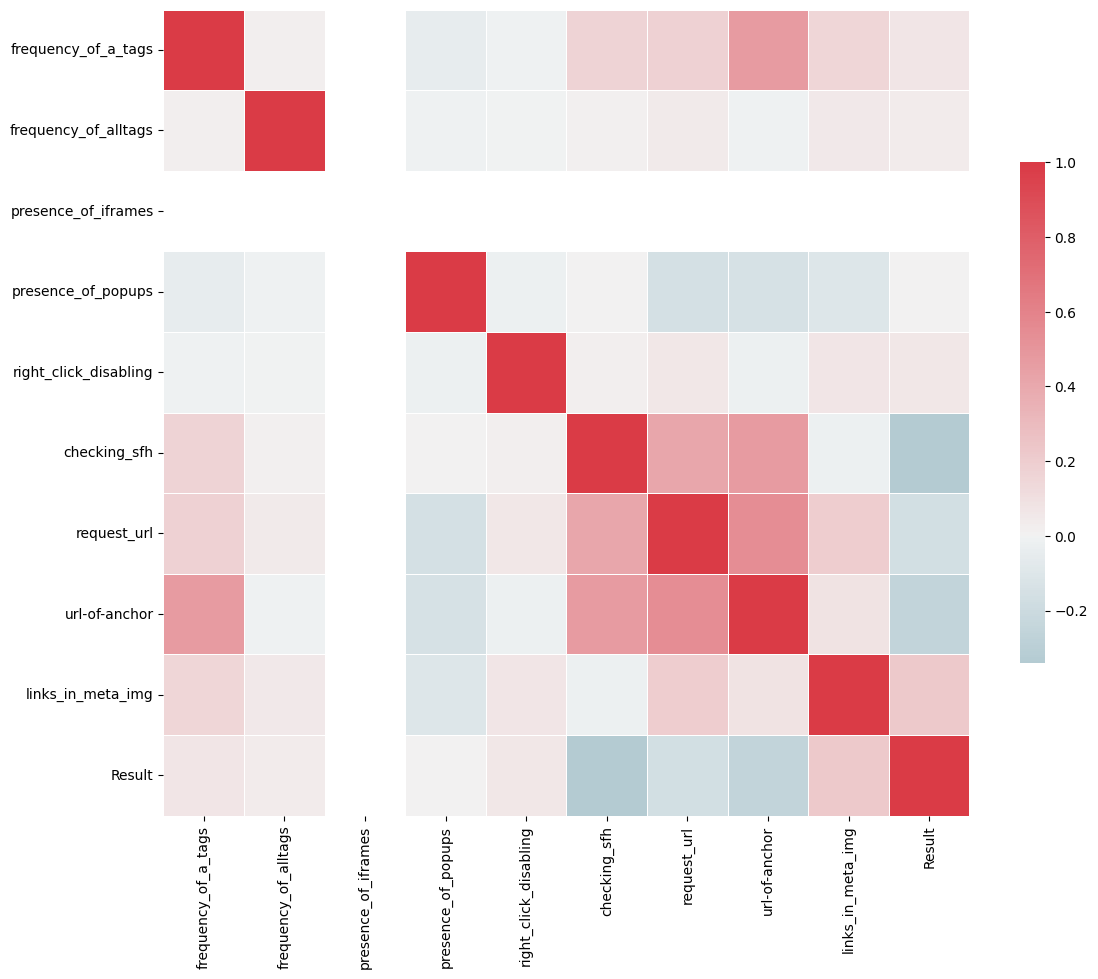

In [54]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 13))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})